### 二分类任务
数据中有正常的数据和异常数据（被欺诈）
<br><br>**样本不均衡处理方法**
1. 下采样：减少多的特征值的数量
2. 上采样：增加少的特征值的数量


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = '../data/creditcard.csv'
data = pd.read_csv(data_path)
data.head(6) # 查看数据的前n行

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


##### 字段解释：
V1-V28 为特征值
<br>class 为标签。1：异常（负样本），0：正常（正样本）

Text(0, 0.5, 'Frequency')

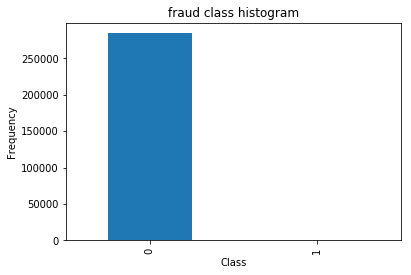

In [3]:
count_classes = pd.value_counts(data['Class'], sort=True) # 统计数据中各个数据值的数量
count_classes.plot(kind='bar') # 使用pands直接画出柱状图
plt.title('fraud class histogram')
plt.xlabel("Class")
plt.ylabel("Frequency")

#### 特征缩放

In [5]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape((-1,1)))

# data['Amount'].reshape(-1,1) 转为列向量。-1：让系统自动计算行数。因为不知道有多少行数据

data = data.drop(['Time', 'Amount'], axis=1) # 删除两列
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


#### 下采样：

In [6]:
# pandas 索引函数有三个：
# loc 在index的标签上进行索引,范围包括start和end.
# iloc 在index的位置上进行索引,不包括end.
# ix 先在index的标签上索引，索引不到就在index的位置上索引(如果index非全整数),不包括end.

x = data.loc[:, data.columns != 'Class'] # ix: 索引函数。取出columns中不等于Class的列
y = data.loc[:, data.columns == 'Class']

number_fraud = len(data[data.Class == 1]) # 统计负样本个数
indices_fraud = np.array(data[data.Class == 1].index) # 记录负样本的索引值

indices_normal = data[data.Class == 0].index

# 随机选出和负样本一样的多的正样本
indices_random_normal = np.random.choice(indices_normal, number_fraud, replace=False)


# 合并两个样本
indices_under_sample = np.concatenate((indices_random_normal, indices_fraud))

data_under_sample = data.iloc[indices_under_sample]
# 取出 x 和 y
x_under_sample = data_under_sample.loc[:,data.columns != 'Class']
y_under_sample = data_under_sample.loc[:,data.columns == 'Class']

### 交叉验证：
将训练集切分为N块，使用其中M块生成模型，N-M块测试模型
<code>
X_train,X_test, y_train, y_test =cross_validation.train_test_split(train_data,train_target,test_size=0.3, random_state=0)
参数解释：

train_data：被划分的样本特征集
train_target：被划分的样本标签
test_size：如果是浮点数，在0-1之间，表示样本占比；如果是整数的话就是样本的数量
random_state：是随机数的种子。

随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。
随机数的产生取决于种子，随机数和种子之间的关系遵从以下两个规则：
种子不同，产生不同的随机数；种子相同，即使实例不同也产生相同的随机数。
</code>

In [9]:
from sklearn.model_selection import train_test_split

# 原始数据集切分
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3)


# 下采样数据集切分
x_train_underSample, x_test_underSample, y_train_underSample, y_test_underSample = train_test_split(x_under_sample, y_under_sample,test_size = 0.3)

print("Number of training whole dataSet:", len(x_train))
print("Number of testing whole dataSet:", len(x_test))
print("\n")

print("Number of training under sample dataSet:", len(x_train_underSample))
print("Number of testing under sample dataSet:", len(x_test_underSample))

Number of training whole dataSet: 199364
Number of testing whole dataSet: 85443


Number of training under sample dataSet: 688
Number of testing under sample dataSet: 296


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report


### 模型评估方法
$$Recall =\frac{TP}{TP+FN} $$ 


|&nbsp; |相关(Relevant),正类 |无关(NonRelevant),负类 |
|:---  |:---  |:---  |
| **被检索到（Retrieved）** |true positive(TP 正类判定为正类，即正确判定) |false positive(FP 负类判断为正类）|
|**被检测到（Not Retrieved）** |false negative(FN 判断错误，判断为负类，则结果为正类)|true negative(TN,判断正确，判断为负类)|

#### 交叉验证KFold

<a href = "https://www.jianshu.com/p/284581d9b189">K-Fold 交叉验证 (Cross-Validation)</a>


### 正则化惩罚（解决过拟合问题）
过拟合： （高方差）在训练集上表现良好，在测试集上变现很差
<br>
**L2正则化：** $$J(\theta) = J(\theta) + \lambda \sum^{n}_{j=1}\theta^2_j $$
**L1正则化：** $$J(\theta) = J(\theta) + \lambda \sum^{n}_{j=1}|\theta_j| $$

In [22]:
def get_Kfold_scores(x_train, y_train, lambda_range = [0.01, 0.1, 1, 10, 100]):
# c_param_range：  正则化惩罚项中的lambda取值

    fold = KFold(5, shuffle=False)
#     KFold:
#     参数(n, n_folds=3, shuffle=False, random_state=None)
#     n为总数
#     n_folds为分为多少个交叉验证集
#     shuffle为是否随机
#     random_state设置随机因子
     
    scores_lambda = []
    for var_lambda in lambda_range:# 选取更好的lambda
        c = 1.0 / var_lambda
        
        print('-'* 30)
        print("regularization lambda: {}".format(var_lambda))
        print('-'* 30)
        
        scores_cross_vali = []
        for iteration, indices in enumerate(fold.split(x_train), start = 1): #同时返回可迭代对象的索引与值
            # indices[0]:训练集
            # indices[1]:测试集

            # 选择模型为逻辑回归，实例化模型
            lr = LogisticRegression(C = c, penalty = 'l1', solver='liblinear')
            #  C: 正则化惩罚中lambda的倒数
            #  penalty: 选择L1正则化还是L2正则化

            # 拟合数据，训练模型
            lr.fit(x_train.iloc[indices[0]], y_train.iloc[indices[0]].values.ravel()) 
            # fit(X, y, sample_weight=None)

            res_predict = lr.predict(x_train.iloc[indices[1]])

            score = recall_score(y_train.iloc[indices[1]], res_predict)
            scores_cross_vali.append(score)
            print("Iteration %d : recall score: %.2f" % (iteration, score * 100.0 ))
        
        mean_scores = np.mean(scores_cross_vali)
        scores_lambda.append( mean_scores)
        print("\nmean score of lambda %.3f : %.2f\n" % (var_lambda, mean_scores * 100.0 ))
            # float recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    best_lambda = lambda_range[scores_lambda.index(max(scores_lambda))]
    print('*' * 30)
    print("The Best lambda is {}".format(best_lambda))
    print('*' * 30)
    return best_lambda

best_lambda = get_Kfold_scores(x_train_underSample, y_train_underSample)

------------------------------
regularization lambda: 0.01
------------------------------
Iteration 1 : recall score: 91.30
Iteration 2 : recall score: 95.59
Iteration 3 : recall score: 87.80
Iteration 4 : recall score: 85.00
Iteration 5 : recall score: 93.33

mean score of lambda 0.010 : 90.61

------------------------------
regularization lambda: 0.1
------------------------------
Iteration 1 : recall score: 91.30
Iteration 2 : recall score: 92.65
Iteration 3 : recall score: 86.59
Iteration 4 : recall score: 85.00
Iteration 5 : recall score: 92.00

mean score of lambda 0.100 : 89.51

------------------------------
regularization lambda: 1
------------------------------
Iteration 1 : recall score: 91.30
Iteration 2 : recall score: 91.18
Iteration 3 : recall score: 87.80
Iteration 4 : recall score: 85.00
Iteration 5 : recall score: 92.00

mean score of lambda 1.000 : 89.46

------------------------------
regularization lambda: 10
------------------------------
Iteration 1 : recall scor

/Users/zheng/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 混淆矩阵

In [25]:
def plot_confusion_matrix(matrix, classes, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap) #interpolation: 把某块显示成一种颜色
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    thresh = matrix.max() / 2.
    
    #plt.xticks : 第一个数组参数是标示的位置，第二个数组是标示的文字
    plt.xticks(tick_marks, classes) 
    plt.yticks(tick_marks, classes)
    for y in range(len(matrix)):
        for x in range(len(matrix[0])):
            plt.text(x, y, matrix[y,x]
                    ,horizontalalignment="center" 
                    ,color="white" if matrix[y,x] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 逻辑回归阈值对结果的影响

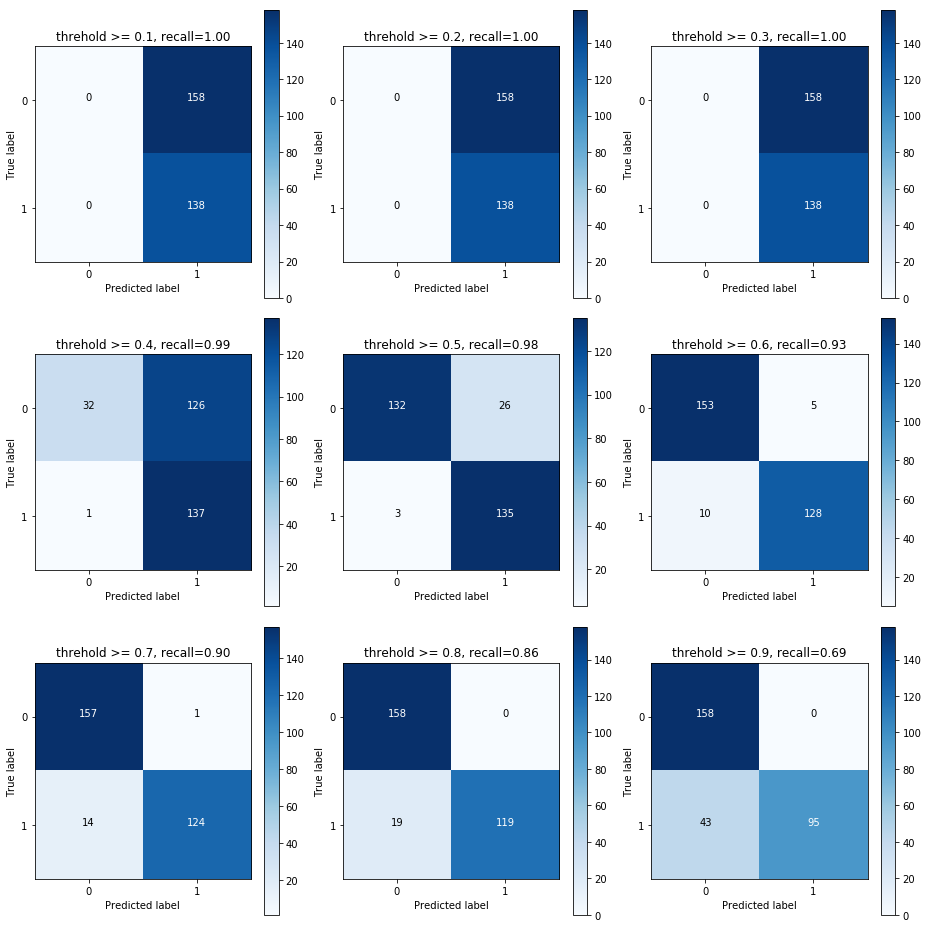

In [23]:
threholds = [0.1 * i for i in range(1, 10)]

lr = LogisticRegression(C= 1.0 / best_lambda, penalty='l1', solver='liblinear')
lr.fit(x_train_underSample, y_train_underSample.values.ravel())
y_predict_underSample = lr.predict(x_test_underSample)
conf_matrix = confusion_matrix(y_test_underSample.values.ravel(),y_predict_underSample)
y_predict_underSample_proba = lr.predict_proba(x_test_underSample) # 返回预测结果的可能性

j = 1
plt.figure(figsize=(13,13))
for threhold in threholds:
    plt.subplot(3,3,j)
    j += 1
    y_predict = y_predict_underSample_proba[:, 1] > threhold
    matrix = confusion_matrix(y_test_underSample, y_predict)
    plot_confusion_matrix(matrix, [0, 1],title="threhold >= %.1f, recall=%.2f" % (threhold, recall_score(y_test_underSample.values.ravel(), y_predict)))



### 过采样
*少数类样本生成*

#### SMOTE 算法
使用k-近邻算法生成与目标特征相近的随机特征

imblearn: 不平衡数据处理包

In [33]:
from imblearn.over_sampling import SMOTE
smoter = SMOTE()
x_train_overSample, y_train_overSample = smoter.fit_sample(x_train.values, y_train.values.ravel())

In [59]:
lr_raw = LogisticRegression(C = 100, penalty = 'l1', solver='liblinear')
lr_overSample = LogisticRegression(C = 100, penalty = 'l1', solver='liblinear')

lr_raw.fit(x_train, y_train.values.ravel())
lr_overSample.fit(x_train_overSample, y_train_overSample)

y_raw_predict = lr_raw.predict(x_test)
y_overSample_predict = lr_overSample.predict(x_test)

cmatrix_raw = confusion_matrix(y_test, y_raw_predict)
cmatrix_overSample = confusion_matrix(y_test, y_overSample_predict)

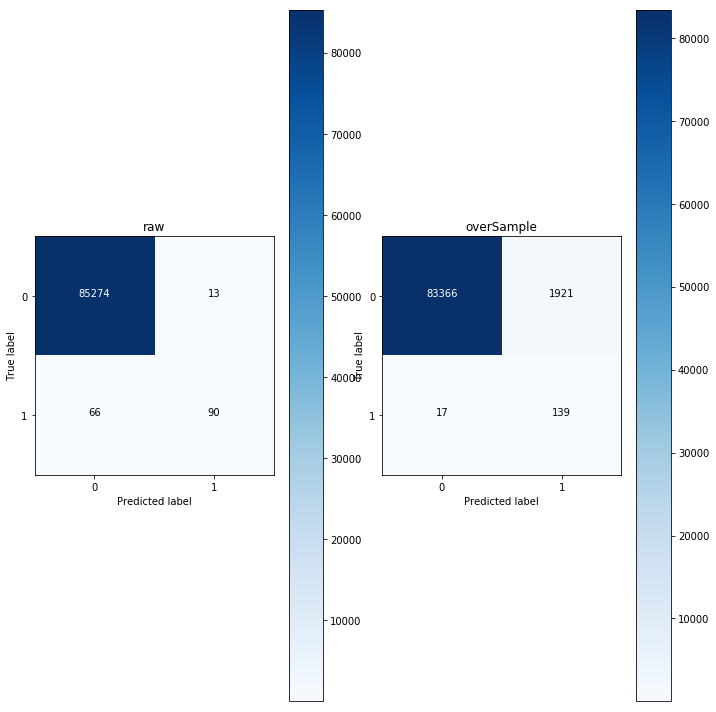

In [63]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plot_confusion_matrix(cmatrix_raw, classes=[0,1], title="raw")
plt.subplot(1,2,2)
plot_confusion_matrix(cmatrix_overSample, classes=[0,1], title="overSample")

In [69]:
x_train_overSample = pd.DataFrame(x_train_overSample)
y_train_overSample = pd.DataFrame(y_train_overSample)
get_Kfold_scores(x_train_overSample, y_train_overSample)

------------------------------
regularization lambda: 0.01
------------------------------
Iteration 1 : recall score: 94.85
Iteration 2 : recall score: 96.15
Iteration 3 : recall score: 92.72
Iteration 4 : recall score: 91.02
Iteration 5 : recall score: 91.04

mean score of lambda 0.010 : 93.16

------------------------------
regularization lambda: 0.1
------------------------------
Iteration 1 : recall score: 94.85
Iteration 2 : recall score: 96.15
Iteration 3 : recall score: 92.73
Iteration 4 : recall score: 91.05
Iteration 5 : recall score: 91.04

mean score of lambda 0.100 : 93.16

------------------------------
regularization lambda: 1
------------------------------
Iteration 1 : recall score: 94.85
Iteration 2 : recall score: 96.15
Iteration 3 : recall score: 92.72
Iteration 4 : recall score: 91.04
Iteration 5 : recall score: 91.04

mean score of lambda 1.000 : 93.16

------------------------------
regularization lambda: 10
------------------------------
Iteration 1 : recall scor

0.1

In [52]:
len(y_train_overSample[y_train_overSample[:] == 0])


199028

In [43]:
type(y_train_overSample)

numpy.ndarray